In [3]:
# Codice per clonare la repository di github con tutti i dati. Va eseguito una sola volta
# (per questo si controlla se la cartella esista già o meno)
# È stato scelto questo metodo per permettere a tutti, sia da google colab che in locale,
# di avere i dati a disposizione

# Se si esegue in locale, assicurarsi di avere git installato
# Al link della repository sono visionabili tutti i file
from os import path
if not path.exists("Laboratorio_Fisica_3"):
    !git clone https://github.com/MasterRoby3/Laboratorio_Fisica_3

# Per comodità si definisce una variabile che sia la radice di tutti i percorsi utilizzati, in modo da alleggerire il codice successivo
rad = "Laboratorio_Fisica_3/Polarizzazione/"

# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1

# Polarizzazione della luce e lamine di ritardo

Scopo di quest'esperienza è quello di studiare l'effetto di polarizzatori e lamine di ritardo. È suddivisa in varie parti, ciascuna delle quali è dedicata all'analisi del comportamento di un diverso componente.
In tutti i seguenti setup sperimentali si è utilizzato un led come fonte luminosa e un fotodiodo come rilevatore, similmente a quanto fatto nell'esperienza sulle lenti (i segnali vengono registrati in tensione con un oscilloscopio)

## Parte 1: polarizzatori lineari e legge di Malus
In questa parte dell'esperienza si utilizzano due polarizzatori lineari: il primo per polarizzare linearmente la luce non polarizzata del LED, il secondo per studiare la legge di Malus. Si procede quindi registrando i dati in tensione al variare dell'angolo del secondo polarizzatore, secondo lo schema riportato in figura (fonte: slide di laboratorio).

<br><center><img src="Laboratorio_Fisica_3/Polarizzazione/img/malus.png" /></center><br>

La legge da verificare è la legge di Malus:
$$I(\vartheta) = I_0 \cos^2\vartheta$$

I segnali misurati, come in altre esperienze, sono in tensione: il fotodiodo viene polarizzato inversamente in modo da rispondere linearmente (con la scatoletta nera) in modo che si abbia: $V_{ph} \propto I$ (questo ragionamento si applicherà anche alle misure successive).

Per verificare la legge, quindi, si registrano i dati in tensione al variare dell'angolo.
Di seguito si riporta il plot e il fit.

In [98]:
# Qui si definiscono le funzioni utili per il fit
def malus(theta, V_0):
    return V_0 * (np.cos(theta)**2)

def elliptic(theta, theta_0, V_y, V_z):
    return V_y * np.cos(theta - theta_0)**2 + V_z * np.sin(theta - theta_0)**2

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Dataframe da csv: 
    theta      V
0       0  348.0
1      10  340.0
2      20  324.0
3      30  288.0
4      40  232.0
5      45  206.0
6      50  172.0
7      60  122.0
8      70   72.8
9      80   40.4
10     90   27.2
11    100   33.6
12    110   57.2
13    120  100.0
14    130  154.0
15    140  208.0
16    150  264.0
17    160  306.0
18    170  340.0
19    180  352.0
20    190  336.0
21    200  304.0
22    210  260.0
23    220  200.0
24    230  142.0
25    240   92.0
26    250   52.0
27    260   29.2
28    270   28.8
29    280   47.6
30    290   84.0
31    300  134.0
32    310  188.0
33    320  242.0
34    330  296.0
35    340  332.0
36    350  348.0
37    360  352.0
Valore fittato per V_0= 364 mV deviazione standard= 34.6 mV
R^2 =  0.96591


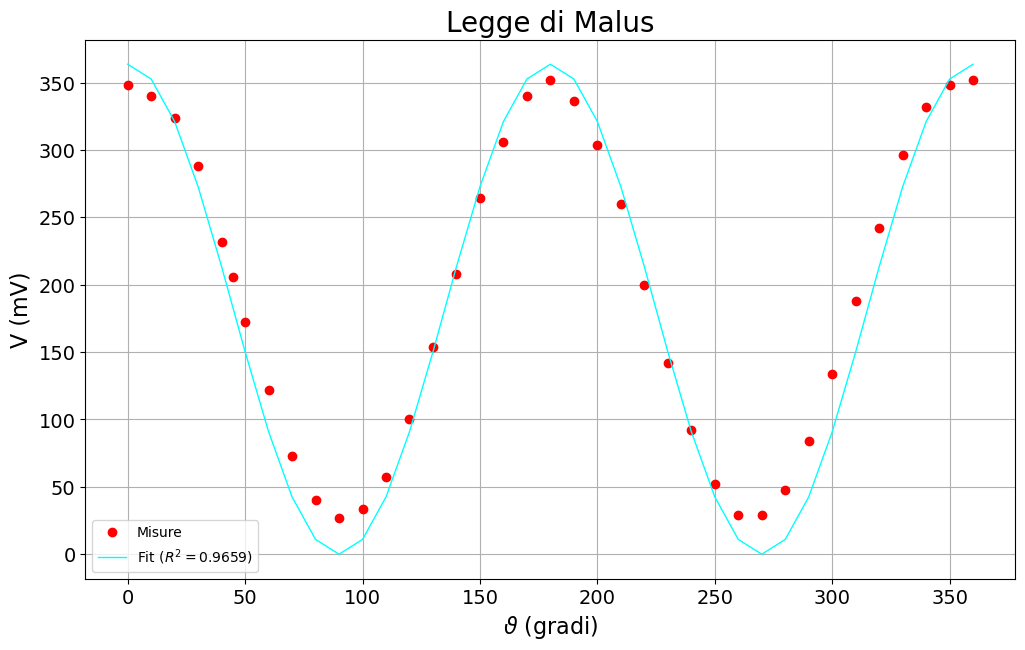

In [15]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/malus.csv")

print("Dataframe da csv: ")
print(data)
headers = data.keys()

# Creo gli array numpy per l'analisi successiva
theta = data['theta'].to_numpy()
theta_rad = np.radians(theta)
V = data['V'].to_numpy()

# Cella per il fit dei dati
# Definizione dei bounds
x_0_min, x_0_max = 0, 5
A_min, A_max = 0, 5000
min, max = [x_0_min, A_min], [x_0_max, A_max]
bounds = [min, max]
ndata = len(V)          #numero di dati analizzati

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(malus, theta_rad, V)
V_0 = popt[0]
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(V, malus(theta_rad, V_0))

print('Valore fittato per V_0=', "{:.3g}".format(V_0), 'mV deviazione standard=',"{:.3g}".format(sigma[0]), 'mV')
print("R^2 = ", "{:.5g}".format(r_sq))

# In questa cella si procede al plot dei dati
fig, ax = plt.subplots(1, 1, figsize=[12,7])

ax.set_title('Legge di Malus', size=titlefontsize)
ax.plot(theta, V, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Misure")
ax.plot(theta, malus(theta_rad, V_0), linewidth=linewidth, color='cyan', label="Fit ($R^2=${:.4f})".format(r_sq))
ax.set_xlabel(r'$\vartheta$ (gradi)', size=labelfontsize)
ax.set_ylabel('V (mV)', size=labelfontsize)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend();

Dal plot si può vedere che l'accordo non è perfetto, ma ci sono delle fluttuazioni dovute all'apparato sperimentale (una collimazione non precisissima può causare questo problema); il valore ottenuto di $V_0 = (364 \pm 35) mV$ è in accordo con il valore di picco misurato $V_{picco} = 352 mV$.

## Parte 2: lamina di ritardo $\lambda /2$
In questa esperienza si interpone tra i due polarizzatori lineari una lamina di ritardo $\lambda /2$ allo scopo di studiarne il comportamento. Il setup è mostrato nell'immagine seguente (fonte: slide di laboratorio).

<br><center><img src="Laboratorio_Fisica_3/Polarizzazione/img/lambda_2.png" /></center><br>

La misura è stata effettuata in questo modo: fissando un valore di $\theta_1$ (angolo della lamina di ritardo), si cercano i valori di $\theta_2$ (angolo del secondo polarizzatore lineare) corrispondenti al massimo e al minimo dell'intensità. Da questi dati si deve verificare che la luce è polarizzata linearmente, come si vede facilmente dalla tabella sotto. In particolare, è evidente la mirror symmetry introdotta dalla lamina, notando che l'angolo di intensità massima corrisponde a $2\theta_1$ (quando $\theta_1 = 0$ gli angoli non sono modificati rispetto al caso senza lamina).

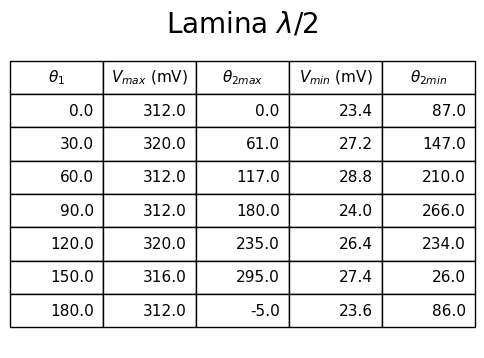

In [90]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/lambda_2.csv")
headers = data.keys()

# Tabella
figure = plt.figure(figsize=[6,4])
plt.title("Lamina $\lambda /2$", size=titlefontsize)
plt.axis('tight')
plt.axis('off')
columns = [r"$\theta_1$", r"$V_{max}$ (mV)", r"$\theta_{2max}$", r"$V_{min}$ (mV)", r"$\theta_{2min}$"]
table = plt.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

## Parte 3: lamina $\lambda /4$
Similmente a ciò fatto nell'esperienza precedente, si vuole studiare il comportamento della lamina $\lambda/4$: qui non si ha luce polarizzata linearmente, ma luce con polarizzazione in generale ellittica.

NOTA: il setup utilizzato è strutturalmente identico a quello utilizzato nella parte 2 con la sostituzione della lamina di ritardo, si farà quindi riferimento all'immagine riportata sopra con $\theta_1$: angolo della lamina di ritardo e $\theta_2$: angolo dell'analizzatore.

Si verifica in primis che con valori di $\theta_1 = 0$ o $\theta_1 = 90$ la luce esce dalla lamina polarizzata linearmente e quindi l'intensità dopo l'analizzatore varia con $\cos^2\theta_2$ (si usa come $V_0$ il valore registrato a $\theta_2 = 0$)

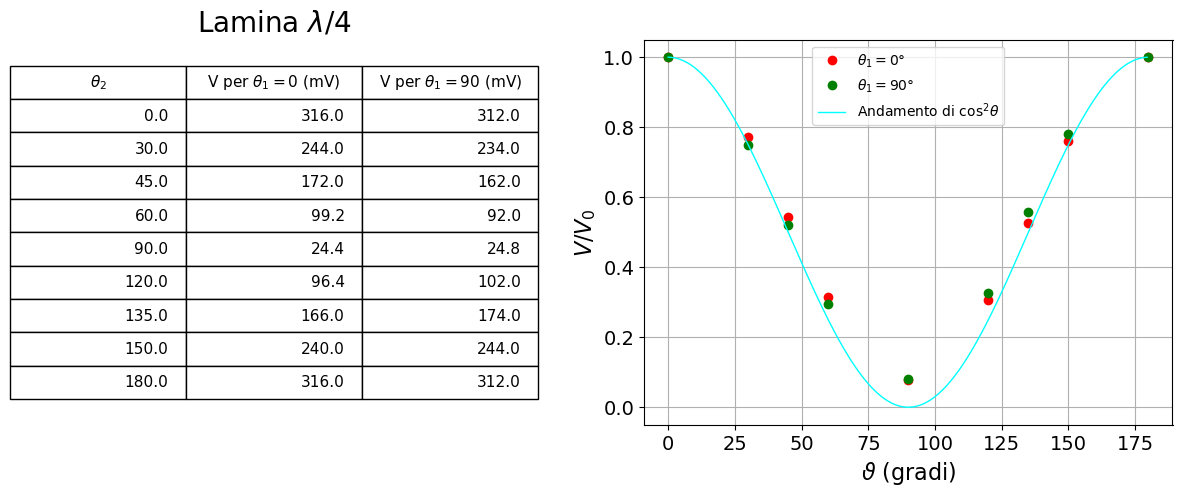

In [91]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/lambda_4_linear.csv")
headers = data.keys()

theta_2 = data["theta_2"].to_numpy();
V_theta1_0 = data["V_theta1_0"].to_numpy();
V_theta1_90 = data["V_theta1_90"].to_numpy();

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
ax1.set_title("Lamina $\lambda /4$", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
columns = [r"$\theta_2$", r"V per $\theta_1 = 0$ (mV)",  r"V per $\theta_1 = 90$ (mV)"]
table = ax1.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ax2.set_title('', size=titlefontsize)
ax2.plot(theta_2, V_theta1_0/V_theta1_0[0], 'o', markersize=markersize, linewidth=linewidth, color='red', label=r"$\theta_1 = 0\degree$")
ax2.plot(theta_2, V_theta1_90/V_theta1_90[0], 'o', markersize=markersize, linewidth=linewidth, color='green', label=r"$\theta_1 = 90\degree$")
angle = np.arange(0.,180.,0.5)
ax2.plot(angle, np.cos(np.radians(angle))**2, linewidth=linewidth, color='cyan', label=r"Andamento di $\cos^2\theta$")
ax2.set_xlabel(r'$\vartheta$ (gradi)', size=labelfontsize)
ax2.set_ylabel('$V/V_0$', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Si verifica ora che con l'angolo $\theta_1 = 45\degree$ la luce uscente dalla lamina è polarizzata circolarmente. Si procede similmente a quanto fatto sopra, ma utilizzando un polar plot (come si noterà, i valori di $V/V_0$ si scostano poco da 1, indicando luce polarizzata circolarmente; come $V_0$ si è usato nuovamente il valore di $V$ a $\theta_2 = 0$).

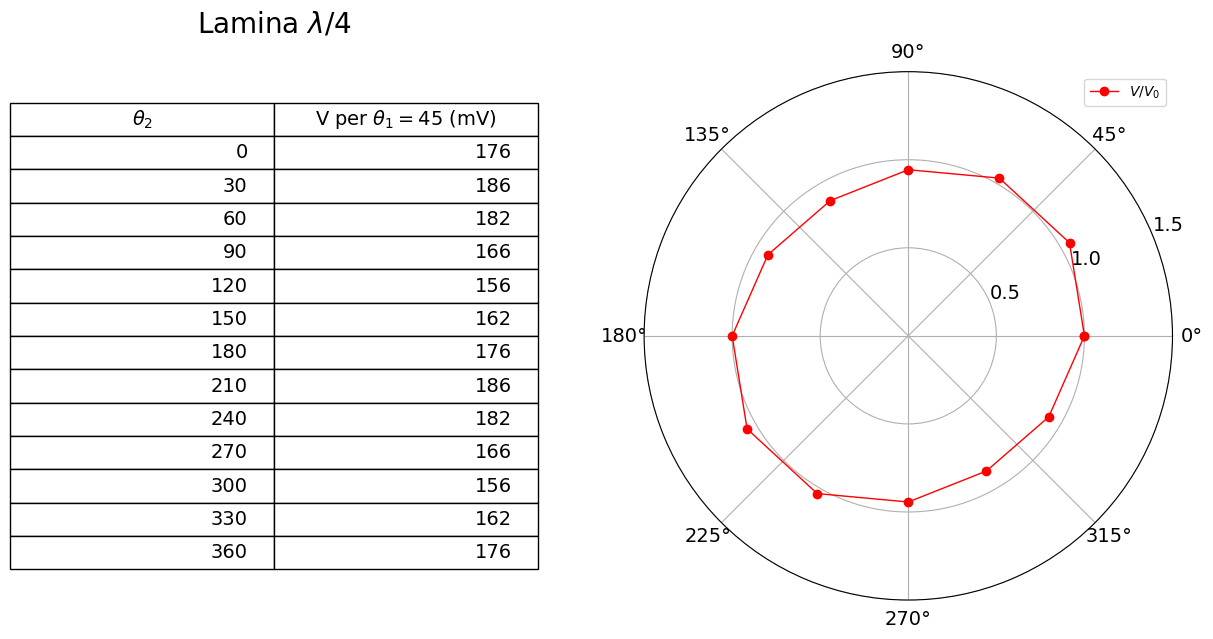

In [92]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/lambda_4_circular.csv")
headers = data.keys()

theta_2 = data["theta_2"].to_numpy();
V_theta1_45 = data["V_theta1_45"].to_numpy();

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,7], subplot_kw=dict(projection='polar'))
ax1.set_title("Lamina $\lambda /4$", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
columns = [r"$\theta_2$", r"V per $\theta_1 = 45$ (mV)"]
table = ax1.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ax2.set_title('', size=titlefontsize)
ax2.plot(np.radians(theta_2), V_theta1_45/V_theta1_45[0], '-o', markersize=markersize, linewidth=linewidth, color='red', label=r"$V/V_0$")
ax2.set_rmax(1.5)
ax2.set_rticks([0.5, 1, 1.5])  # Less radial ticks
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Procedendo in maniera analoga, si verifica la polarizzazione ellittica per angoli qualsiasi (sempre mediante polar plot).

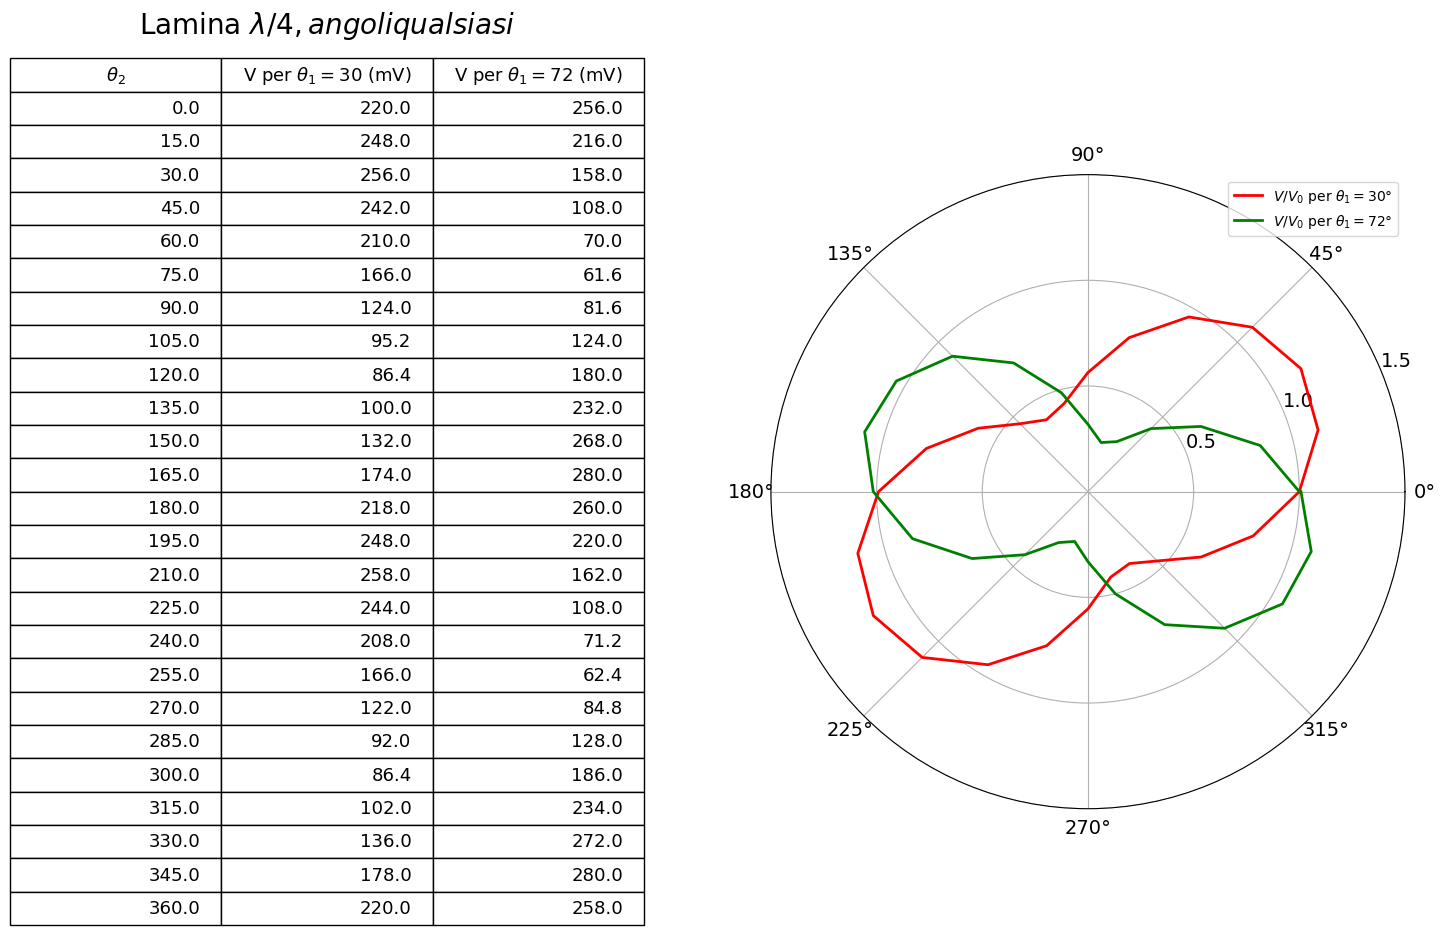

In [93]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/lambda_4_elliptic.csv")
headers = data.keys()

theta_2 = data["theta_2"].to_numpy();
V_theta1_30 = data["V_theta1_30"].to_numpy();
V_theta1_72 = data["V_theta1_72"].to_numpy();

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[18,11], subplot_kw=dict(projection='polar'))
ax1.set_title("Lamina $\lambda /4, angoli qualsiasi$", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
columns = [r"$\theta_2$", r"V per $\theta_1 = 30$ (mV)", r"V per $\theta_1 = 72$ (mV)"]
table = ax1.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ax2.set_title('', size=titlefontsize)
ax2.plot(np.radians(theta_2), V_theta1_30/V_theta1_30[0], '-', linewidth=linewidth*2, color='red', label=r"$V/V_0$ per $\theta_1 = 30 \degree$")
ax2.plot(np.radians(theta_2), V_theta1_72/V_theta1_72[0], '-', linewidth=linewidth*2, color='green', label=r"$V/V_0$ per $\theta_1 = 72 \degree$")
ax2.set_rmax(1.5)
ax2.set_rticks([0.5, 1, 1.5])  # Less radial ticks
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Oltre al polar plot, si può provare a fare un fit a 3 parametri della formula generica dell'intensità per un'onda polarizzata ellitticamente:
$$I = I_y \cos^2 \left(\vartheta - \vartheta_0 \right) + I_z \sin^2 \left(\vartheta - \vartheta_0 \right)$$
Essendo che, come già detto, qui si lavora in tensione (che è lineare all'intensità), la formula diventa:
$$V = V_y \cos^2 \left(\vartheta - \vartheta_0 \right) + V_z \sin^2 \left(\vartheta - \vartheta_0 \right)$$

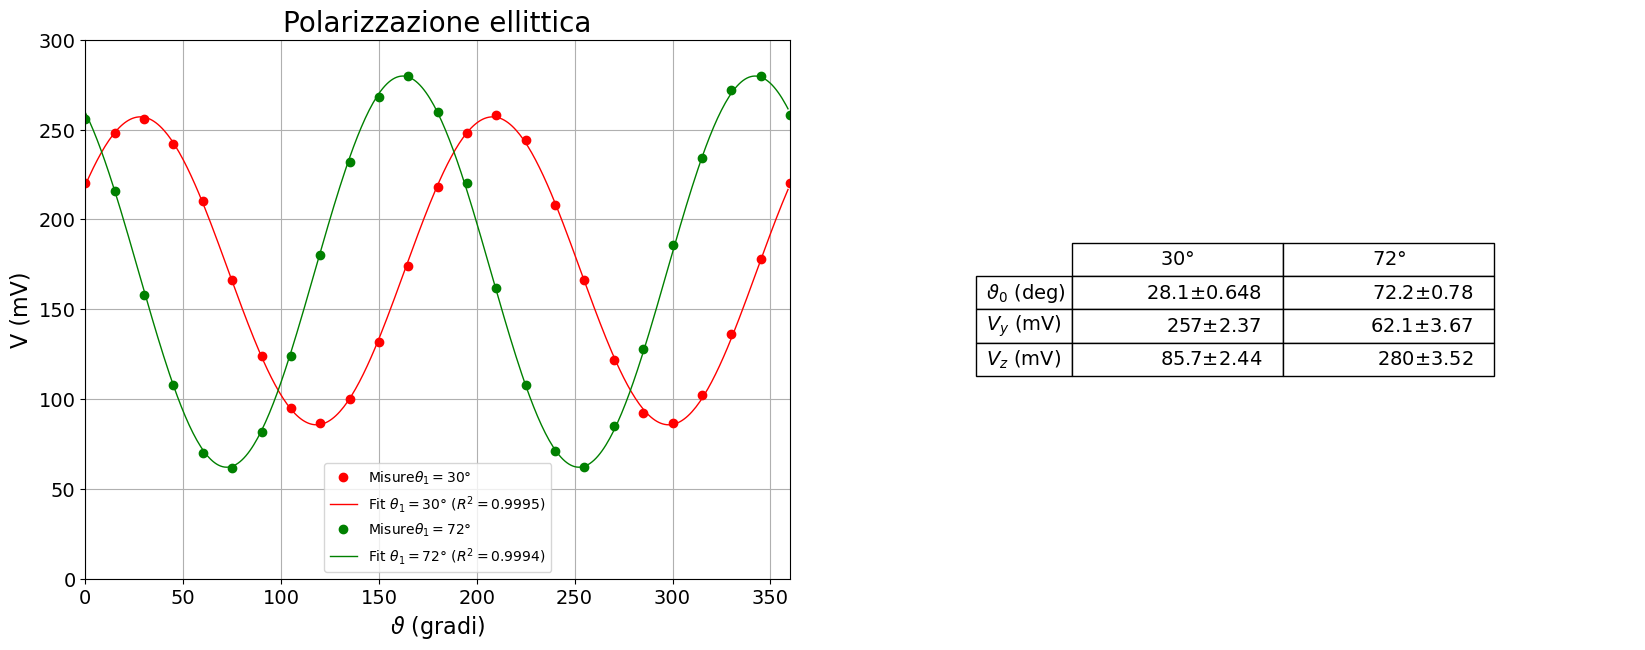

In [112]:
# Fit a 3 parametri
# Definizione dei bounds
x_0_min, x_0_max = 0, 5
A_min, A_max = 0, 5000
min, max = [x_0_min, A_min], [x_0_max, A_max]
bounds = [min, max]
ndata = len(theta_2)          #numero di dati analizzati

# Conversione in radianti
theta_2_rad = np.radians(theta_2)

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(elliptic, theta_2_rad, V_theta1_30)
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))

theta_0_30 = [popt[0], sigma[0]]
V_y_30 = [popt[1], sigma[1]]
V_z_30 = [popt[2], sigma[2]]
r_sq_30 = r_squared(V_theta1_30, elliptic(theta_2_rad, theta_0_30[0], V_y_30[0], V_z_30[0]))

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(elliptic, theta_2_rad, V_theta1_72)
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))

theta_0_72 = [popt[0], sigma[0]]
V_y_72 = [popt[1], sigma[1]]
V_z_72 = [popt[2], sigma[2]]
r_sq_72 = r_squared(V_theta1_72, elliptic(theta_2_rad, theta_0_72[0], V_y_72[0], V_z_72[0]))

# In questa cella si procede al plot dei dati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,7])

ax1.set_title('Polarizzazione ellittica', size=titlefontsize)

x_fit = np.arange(0., 360., 1.)
ax1.plot(theta_2, V_theta1_30, 'o', markersize=markersize, color='red', label=r"Misure$\theta_1 = 30 \degree$")
ax1.plot(x_fit, elliptic(np.radians(x_fit), theta_0_30[0], V_y_30[0], V_z_30[0]), linewidth=linewidth, color='red', label=r"Fit $\theta_1 = 30 \degree$ ($R^2=${:.4f})".format(r_sq_30))
ax1.plot(theta_2, V_theta1_72, 'o', markersize=markersize, color='green', label=r"Misure$\theta_1 = 72 \degree$")
ax1.plot(x_fit, elliptic(np.radians(x_fit), theta_0_72[0], V_y_72[0], V_z_72[0]), linewidth=linewidth, color='green', label=r"Fit $\theta_1 = 72 \degree$ ($R^2=${:.4f})".format(r_sq_72))

ax1.set_xlabel(r'$\vartheta$ (gradi)', size=labelfontsize)
ax1.set_ylabel('V (mV)', size=labelfontsize)
ax1.set_xlim(0,360)
ax1.set_ylim(0,300)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)
ax1.legend();

ax2.axis('tight')
ax2.axis('off')
cols = ["$30 \degree$", "$72 \degree$"]
rows = [r"$\vartheta_0$ (deg)", "$V_y$ (mV)", "$V_z$ (mV)"]
table_data = [
    ["{:.3g}".format(np.degrees(theta_0_30[0])) + r"$\pm$" + "{:.3g}".format(np.degrees(theta_0_30[1])), "{:.3g}".format(np.degrees(theta_0_72[0])) + r"$\pm$" + "{:.3g}".format(np.degrees(theta_0_72[1]))],
    ["{:.3g}".format(V_y_30[0]) + r"$\pm$" + "{:.3g}".format(V_y_30[1]), "{:.3g}".format(V_y_72[0]) + r"$\pm$" + "{:.3g}".format(V_y_72[1])],
    ["{:.3g}".format(V_z_30[0]) + r"$\pm$" + "{:.3g}".format(V_z_30[1]), "{:.3g}".format(V_z_72[0]) + r"$\pm$" + "{:.3g}".format(V_z_72[1])],
]
table = ax2.table(cellText=table_data, colLabels=cols, rowLabels=rows, loc='center')
table.set_fontsize(14)
table.scale(0.6, 2)

Come si può facilmente verificare, il valore di $\vartheta_0$ trovato è abbastanza simile al valore atteso in entrambi i casi.

## Parte 4: verifica che la luce del LED sia non polarizzata
Per procedere in quest'analisi, si registra inizialmente l'intensità a vari angoli di un solo analizzatore, ottenendo che l'intensità rimane costante al variare dell'angolo. Si è dedotto quindi che la luce del led debba essere o polarizzata circolarmente o non polarizzata.
In seconda battuta, si pone una lamina $\lambda/4$ a $45\degree$ prima dell'analizzatore:
* se la luce del LED fosse polarizzata circolarmente, la lamina dovrebbe produrre luce polarizzata linearmente
* se la luce del LED fosse non polarizzata, anche dopo la lamina rimarrebbe non polarizzata
Dato che anche in questo secondo caso a vari angoli dell'analizzatore si sono ottenuti valori di intensità costante, si conclude che la luce del LED è non polarizzata.

Di seguito si riporta la tabella con i dati raccolti.

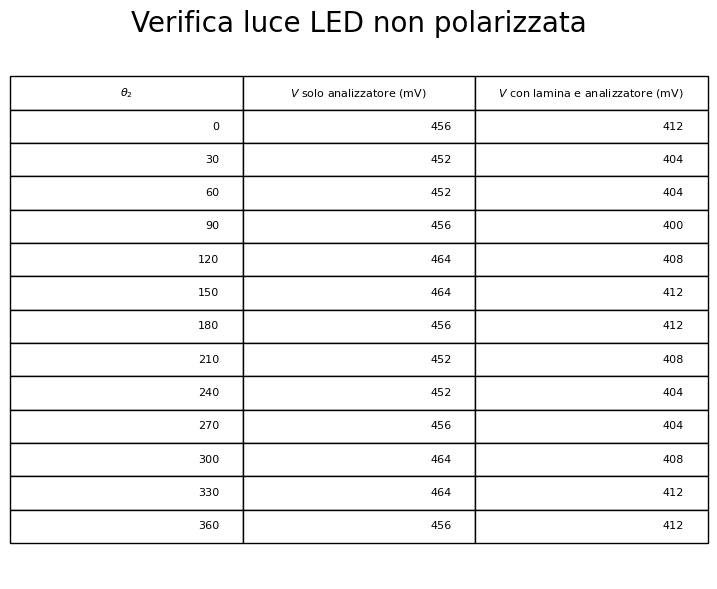

In [97]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/verif_led_not_pol.csv")
headers = data.keys()

theta = data["theta"].to_numpy();
V_analizz = data["V"].to_numpy();
V_lamina_analizz = data["V_lamina"].to_numpy();

# Tabella
figure = plt.figure(figsize=[9,7])
plt.title("Verifica luce LED non polarizzata", size=titlefontsize)
plt.axis('tight')
plt.axis('off')
columns = [r"$\theta_2$", r"$V$ solo analizzatore (mV)", r"$V$ con lamina e analizzatore (mV)"]
table = plt.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)